In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [8]:
def box_plots(df):
    df_melted = df.melt(id_vars=['Name'], var_name='Trait', value_name='Score')
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Trait', y='Score', data=df_melted)
    plt.title("Personality Traits Box Plots")
    plt.xlabel("Traits")
    plt.ylabel("Scores")
    plt.tight_layout()
    plt.show()



In [16]:
df1=pd.read_csv('./test_scores/BFI/result_cs35_bfi_g.csv')
df2=pd.read_csv('./test_scores/BFI/result_cs35_bfi_b.csv')
df3=pd.read_csv('./test_scores/BFI/result_cs35_bfi_n.csv')


In [17]:
df1['category']="good"
df2['category']="bad"
df3['category']="neutral"

In [21]:
df_list=[df1,df2,df3]
df=pd.concat(df_list, ignore_index=True)

In [66]:
df['Openness'].describe()

count    1173.000000
mean        4.209375
std         0.420363
min         2.292000
25%         3.958000
50%         4.125000
75%         4.458000
max         5.000000
Name: Openness, dtype: float64

In [55]:
grouped_means = df.groupby('category')

In [61]:
df.head(12)

,Unnamed: 0,Name,source,Extraversion,Agreeableness,Conscientiousness,Neuroticism,Openness,category
0,0,A. T. Ariyaratne,RM,3.833,4.208,4.375,2.250,4.333,good
1,1,A.H.M. Noman Khan,RM,3.500,4.042,4.292,2.750,4.167,good
2,2,Abdon Nababan,RM,3.833,4.083,4.375,2.333,3.958,good
3,3,Abdul Razak Hussein,RM,3.500,3.875,4.292,2.667,3.708,good
4,4,Abdul Samad Ismail,RM,3.375,3.750,4.042,2.917,3.875,good
5,5,Abdul Sattar Edhi,RM,3.458,4.542,4.917,2.083,4.292,good
6,6,Abdullah Abu Sayeed,RM,3.542,3.875,4.125,3.042,4.167,good
7,7,Abdurrahman Wahid,RM,4.000,4.042,4.125,2.292,4.042,good
8,8,Abel Muzorewa,UNHR,3.667,3.875,3.833,2.625,3.708,good
9,9,Abiy Ahmed Ali,NPP,3.750,3.833,4.375,2.375,3.792,good


In [27]:
def plot_boxplot(df,model_name):
    df_long = pd.melt(
        df,
        id_vars=['Name', 'category'],  # Columns to keep
        value_vars=['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'],  # Columns to melt
        var_name='Trait',  # Name for the categorical variable
        value_name='Value'  # Name for the values
    )


    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df_long, x='Trait', y='Value', palette="Set2",hue="category")


    plt.title(f'Boxplot of {model_name} Traits', fontsize=16)
    plt.xlabel('Personality Traits', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

In [37]:
def plot_violin(df,model_name):
    df_long = pd.melt(
        df,
        id_vars=['Name', 'category'],  # Columns to keep
        value_vars=['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness'],  # Columns to melt
        var_name='Trait',  # Name for the categorical variable
        value_name='Value'  # Name for the values
    )


    plt.figure(figsize=(10, 6))
    sns.violinplot(data=df_long, x='Trait', y='Value', palette="Set2",hue="category")


    plt.title(f'Violinplot of {model_name} Traits', fontsize=16)
    plt.xlabel('Personality Traits', fontsize=12)
    plt.ylabel('Values', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

In [44]:
def stacked_bar_chart(df,model_name,category):
    # Group by source and calculate the mean (or sum) for each trait
    df_grouped = df.groupby('source')[['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']].mean()

    # Prepare the data for plotting
    x = df_grouped.index  # Sources
    traits = df_grouped.columns  # Personality traits
    values = df_grouped.values  # Values for each trait

    # Create a stacked bar chart
    fig, ax = plt.subplots(figsize=(12, 6))

    # Stacking each trait
    bottom = np.zeros(len(x))  # Initialize the bottom for stacking
    for i, trait in enumerate(traits):
        ax.bar(x, df_grouped[trait], label=trait, bottom=bottom)
        bottom += df_grouped[trait]  # Update the bottom for stacking

    # Add labels and legend
    ax.set_title(f'{model_name}: Personality Traits by Source for {category} category.', fontsize=16)
    ax.set_xlabel('Source', fontsize=12)
    ax.set_ylabel('Average Trait Value', fontsize=12)
    ax.legend(title='Traits', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Show the plot
    plt.show()

In [53]:
def radar_chart_grouped_by_source(df):
    # Calculate mean values grouped by source
    grouped_means = df.groupby('source').mean()
    
    # Categories and number of variables
    categories = list(grouped_means.columns)
    N = len(categories)
    
    # Angle of each axis
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the loop
    
    # Create a figure and polar axes
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='polar'))
    
    # Plot data for each source
    for source, row in grouped_means.iterrows():
        values = row.tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1.5, linestyle='solid', label=source)
        ax.fill(angles, values, alpha=0.1)
    
    # Set category labels
    plt.xticks(angles[:-1], categories, fontsize=10)
    
    # Add a title and legend
    plt.title("Personality Traits by Source", fontsize=16)
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 0.1))
    
    plt.tight_layout()
    plt.show()

# Call the function
radar_chart_grouped_by_source(df1)


TypeError: agg function failed [how->mean,dtype->object]

In [76]:
import plotly.graph_objects as go
def radar_chart(df):
  # Convert to numeric in case of issues
  traits = ['Extraversion', 'Agreeableness', 'Conscientiousness', 'Neuroticism', 'Openness']
  df[traits] = df[traits].apply(pd.to_numeric, errors='coerce')

  # Calculate mean values by source
  grouped_means = df.groupby('category')[traits].mean()

  # Radar chart with Plotly
  fig = go.Figure()

  # Add traces for each source
  for source in grouped_means.index:
      fig.add_trace(go.Scatterpolar(
          r=grouped_means.loc[source].tolist(),  # Trait values
          theta=traits,  # Trait names
          fill='toself',
          name=source  # Source name
      ))

  # Update layout
  fig.update_layout(
      polar=dict(
          radialaxis=dict(
              visible=True,
              range=[0, grouped_means.values.max()]  # Dynamic range
          )
      ),
      title="Radar Chart Grouped by Category",
      showlegend=True
  )

  fig.show()

In [77]:
radar_chart(df)

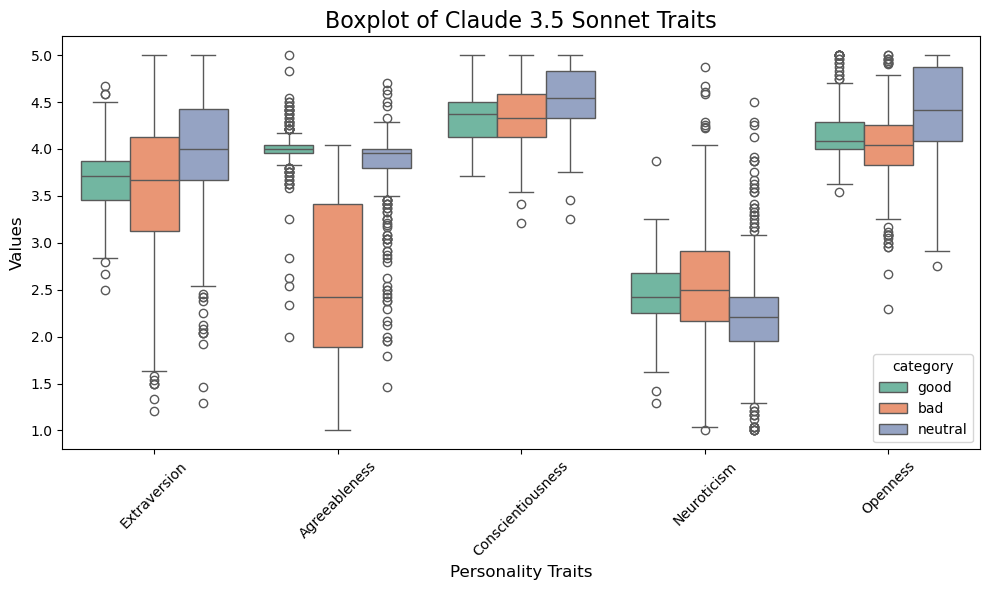

In [36]:
plot_boxplot(df,"Claude 3.5 Sonnet")

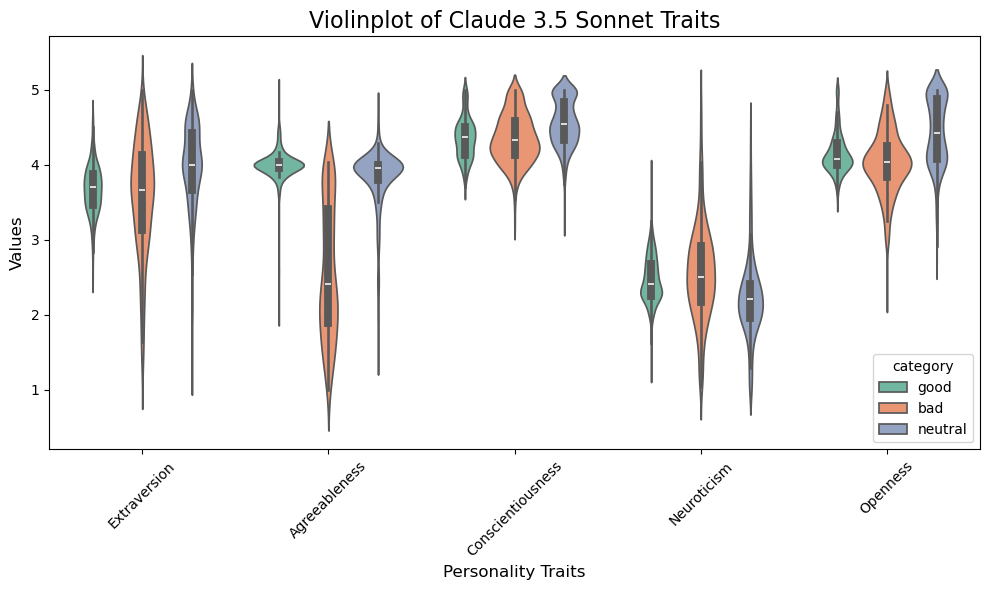

In [38]:
plot_violin(df,"Claude 3.5 Sonnet")

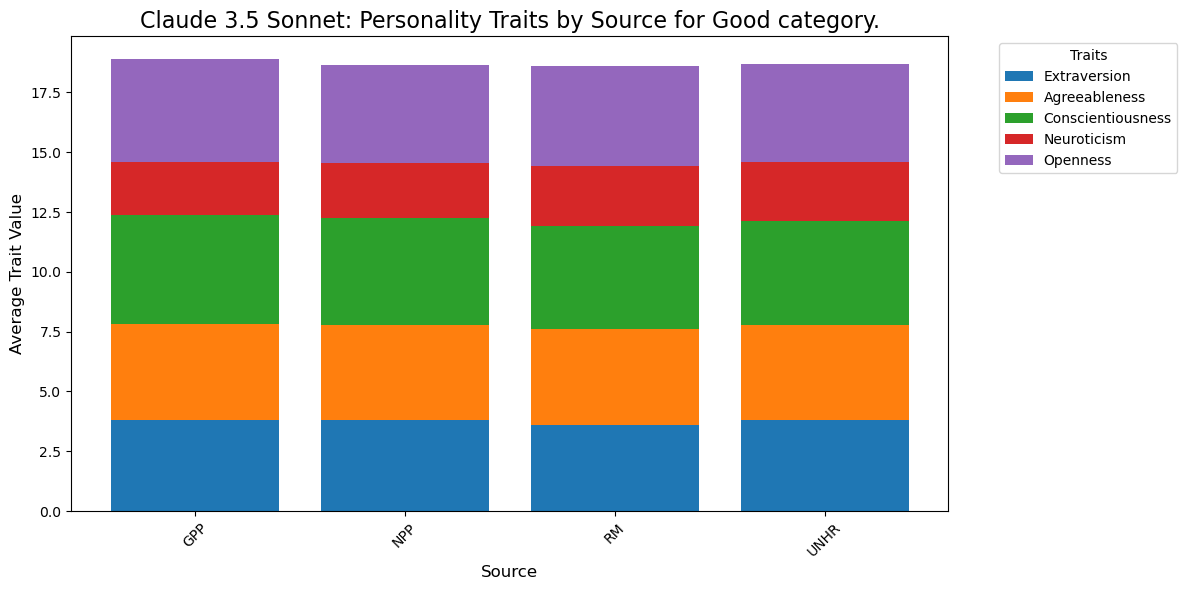

In [45]:
stacked_bar_chart(df1, "Claude 3.5 Sonnet", "Good")

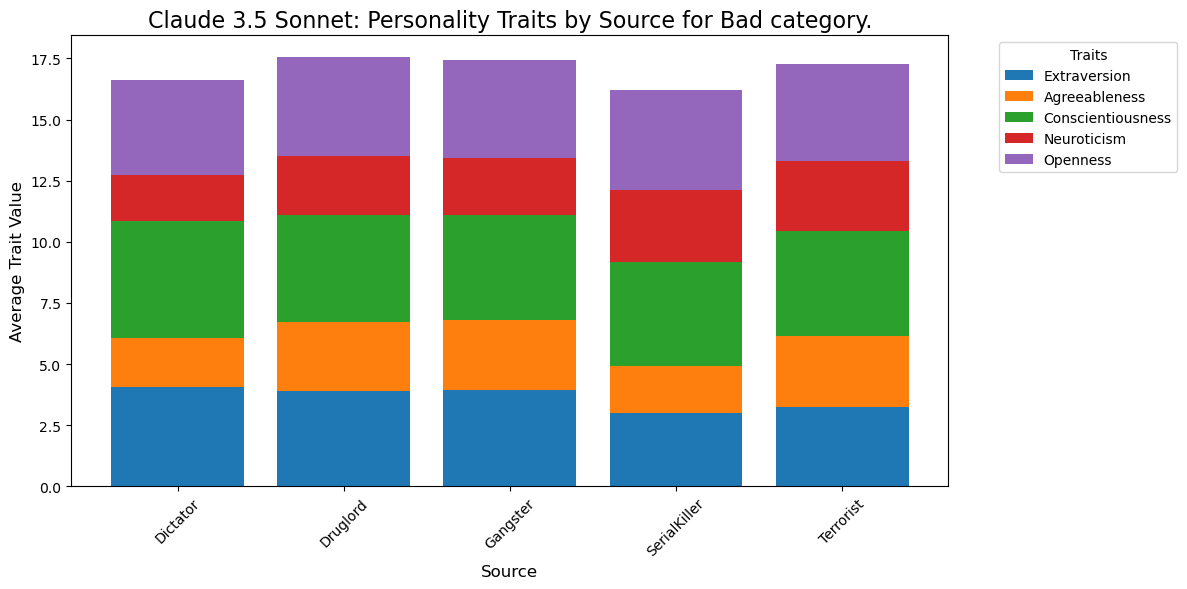

In [46]:
stacked_bar_chart(df2, "Claude 3.5 Sonnet", "Bad")

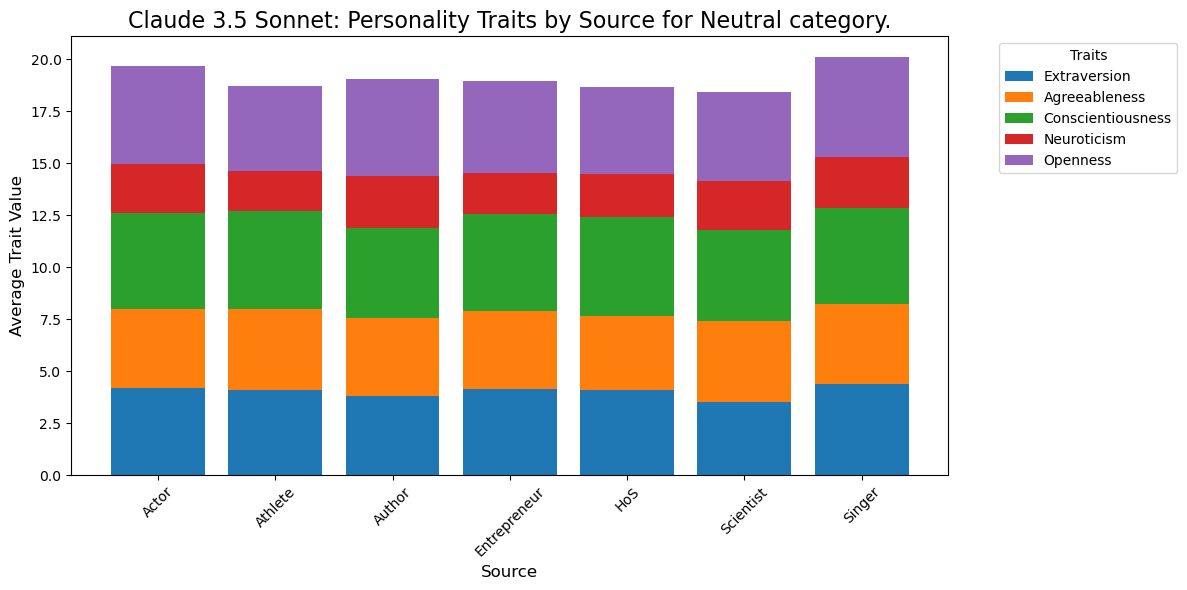

In [47]:
stacked_bar_chart(df3, "Claude 3.5 Sonnet", "Neutral")

In [79]:
df_list=[df1,df2,df3]

In [80]:
columns_list = ['Extraversion',	'Agreeableness', 'Conscientiousness', 'Neuroticism',	'Openness']
custom_names = ['Bad','Good','Neutral']
# Create a list to store the results
results = []

# Iterate through the DataFrames
for df, name in zip(df_list, custom_names):
    for col in columns_list:
        # Calculate mean and std for col1
        mean = df[col].mean()
        std = df[col].std()
        
        # Append the results to the list
        results.append({
            'DataFrame': name,
            'Attribute':col,
            'Mean': mean,
            'Std': std
        })
#print(results)

# Create a new DataFrame from the results
cdf = pd.DataFrame(results)
#print("§§§§§§§§§§§§§§§§§")
#print(cdf)
# Set 'DataFrame' as the index for easier reading
#cdf.set_index('DataFrame', inplace=True)
#print("&&&&&&&&&&&&&&&&&&&&&&&&")
# Display the comparison DataFrame
print(cdf)


   DataFrame          Attribute      Mean       Std
0        Bad       Extraversion  3.674977  0.323274
1        Bad      Agreeableness  3.989482  0.233873
2        Bad  Conscientiousness  4.357915  0.277128
3        Bad        Neuroticism  2.465940  0.312136
4        Bad           Openness  4.150750  0.269201
5       Good       Extraversion  3.570799  0.754007
6       Good      Agreeableness  2.578196  0.883121
7       Good  Conscientiousness  4.349887  0.326925
8       Good        Neuroticism  2.554635  0.638957
9       Good           Openness  4.029166  0.416137
10   Neutral       Extraversion  3.970132  0.591270
11   Neutral      Agreeableness  3.816833  0.421009
12   Neutral  Conscientiousness  4.559787  0.316069
13   Neutral        Neuroticism  2.221468  0.544537
14   Neutral           Openness  4.436045  0.447002


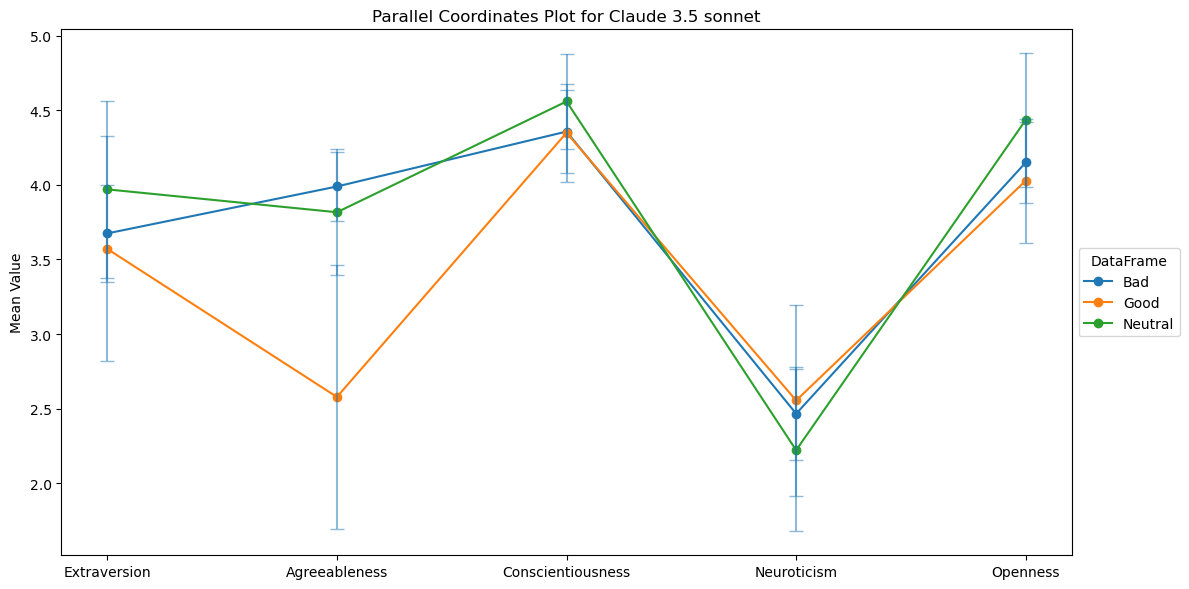

In [ ]:

# Identify the unique DataFrames and Columns
dataframes = cdf['DataFrame'].unique()
columns = cdf['Attribute'].unique()

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot each DataFrame
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.plot(df_data['Attribute'], df_data['Mean'], marker='o', label=df_name)

# Customize the plot
ax.set_xticks(range(len(columns)))
ax.set_xticklabels(columns)
ax.set_ylabel('Mean Value')
ax.set_title('Parallel Coordinates Plot for Claude 3.5 sonnet')
ax.legend(title='DataFrame', loc='center left', bbox_to_anchor=(1, 0.5))
#ax.set_facecolor('lightgrey') 
# error bars for standard deviation
for df_name in dataframes:
    df_data = cdf[cdf['DataFrame'] == df_name]
    ax.errorbar(df_data['Attribute'], df_data['Mean'], yerr=df_data['Std'], 
                fmt='none', capsize=5, alpha=0.5)

plt.tight_layout()
plt.show()